In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
!pip install -U -q pyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_downloaded = drive.CreateFile({'id':'1xl4wws7WzK22F87I6BSjKbmhJF8_py3A'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id':'1Z1I7nSW95hmJclDb-Dq2eonRzK8Ke1lR'})
test_downloaded.GetContentFile('test.csv')

In [0]:
train = pd.read_csv('train.csv',nrows = 1000000)
test = pd.read_csv('test.csv')

In [6]:
train.shape

(1000000, 8)

In [7]:
test.shape

(9914, 7)

In [8]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [10]:
train.isnull().sum().sort_values(ascending = False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [11]:
test.isnull().sum().sort_values()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [0]:
train = train.drop(train[train.isnull().any(1)].index , axis=0)

In [13]:
train.shape

(999990, 8)

In [14]:
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [15]:
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 999952, True: 38})

In [16]:
train = train.drop(train[train['fare_amount']<0].index,axis=0)
train.shape

(999952, 8)

In [17]:
train['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [18]:
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [19]:
Counter(train['passenger_count']<7)

Counter({False: 1, True: 999951})

In [0]:
train = train.drop(train[train['passenger_count']>6].index ,axis=0)

In [21]:
train.shape

(999951, 8)

train['passenger_count'].describe()

In [22]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [23]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [0]:

train = train.drop(train[train['pickup_latitude']>90].index ,axis=0)
train = train.drop(train[train['pickup_latitude']<-90].index ,axis=0)

In [25]:
train.shape

(999939, 8)

In [26]:
train['pickup_longitude'].describe()

count    999939.000000
mean        -72.525443
std          10.692752
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [27]:
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [28]:
train[train['pickup_longitude']>180]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [0]:
train  = train.drop(train[train['pickup_longitude']<-180].index , axis = 0)

In [30]:
train.shape

(999928, 8)

In [0]:
train = train.drop(train[train['dropoff_latitude']>90].index ,axis=0)
train = train.drop(train[train['dropoff_latitude']<-90].index ,axis=0)

In [33]:
train.shape

(999920, 8)

In [0]:
train  = train.drop(train[train['dropoff_longitude']<-180].index , axis = 0)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999911 entries, 0 to 999999
Data columns (total 8 columns):
key                  999911 non-null object
fare_amount          999911 non-null float64
pickup_datetime      999911 non-null object
pickup_longitude     999911 non-null float64
pickup_latitude      999911 non-null float64
dropoff_longitude    999911 non-null float64
dropoff_latitude     999911 non-null float64
passenger_count      999911 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [0]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999911 entries, 0 to 999999
Data columns (total 8 columns):
key                  999911 non-null datetime64[ns]
fare_amount          999911 non-null float64
pickup_datetime      999911 non-null datetime64[ns, UTC]
pickup_longitude     999911 non-null float64
pickup_latitude      999911 non-null float64
dropoff_longitude    999911 non-null float64
dropoff_latitude     999911 non-null float64
passenger_count      999911 non-null int64
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(1)
memory usage: 68.7 MB


In [38]:
train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [0]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['distance'] = d
    return d

In [41]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [42]:
train['distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: distance, dtype: float64

In [0]:
data =[train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['DayOfTheWeek'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [44]:
train.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16


Text(0, 0.5, 'frequency')

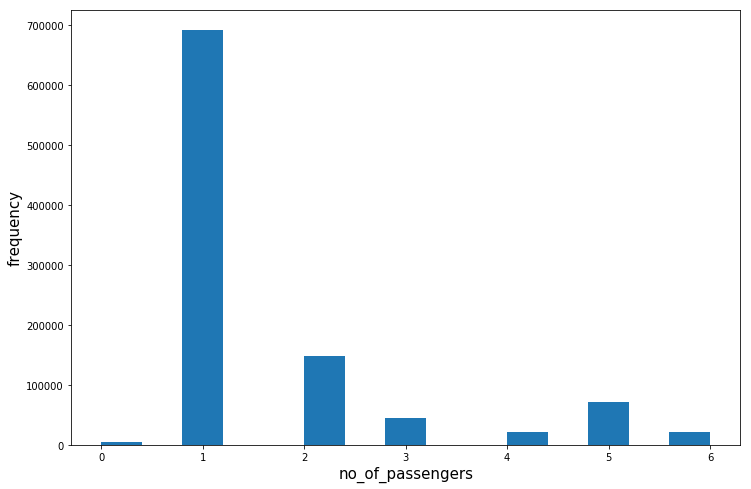

In [45]:
plt.figure(figsize=(12,8))
plt.hist(train['passenger_count'] , bins = 15)
plt.xlabel('no_of_passengers',fontsize = 15)
plt.ylabel('frequency' , fontsize = 15)

Text(0, 0.5, 'fare')

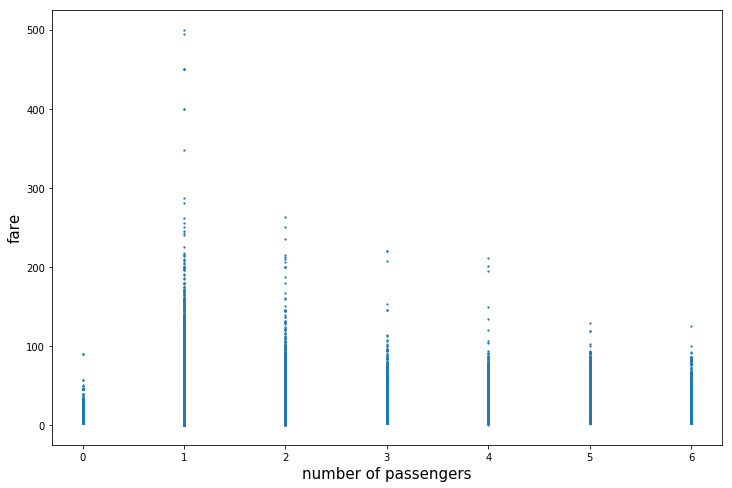

In [46]:
plt.figure(figsize = (12,8))
plt.scatter(x= train['passenger_count'] , y = train['fare_amount'],s=1.5)
plt.xlabel('number of passengers',fontsize = 15)
plt.ylabel('fare' , fontsize = 15)

Text(0, 0.5, 'fare')

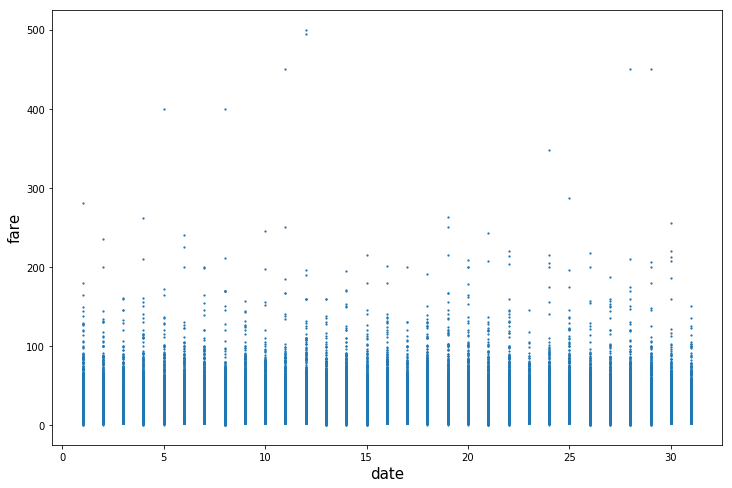

In [47]:
plt.figure(figsize = (12,8))
plt.scatter(x= train['Date'] , y = train['fare_amount'],s=1.5)
plt.xlabel('date',fontsize = 15)
plt.ylabel('fare' , fontsize = 15)

Text(0, 0.5, 'fare')

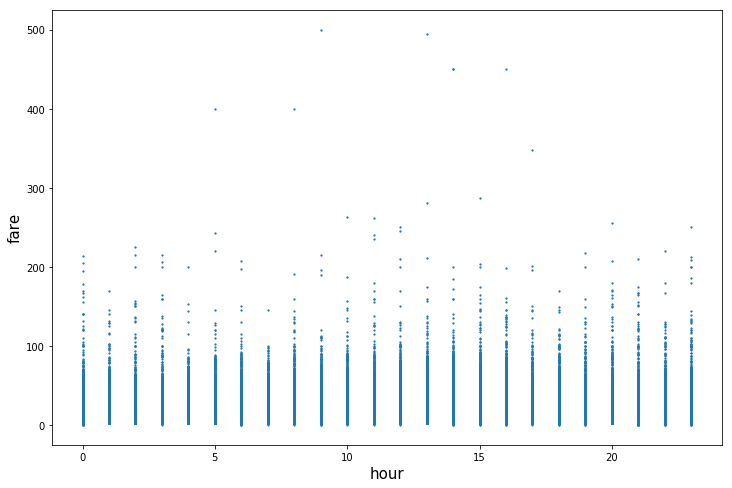

In [48]:
plt.figure(figsize = (12,8))
plt.scatter(x= train['Hour'] , y = train['fare_amount'],s=1.5)
plt.xlabel('hour',fontsize = 15)
plt.ylabel('fare' , fontsize = 15)

Text(0, 0.5, 'fare')

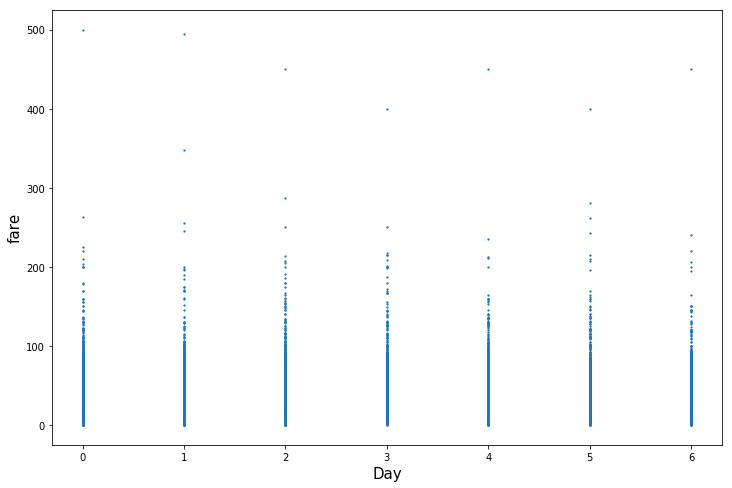

In [49]:
plt.figure(figsize = (12,8))
plt.scatter(x= train['DayOfTheWeek'] , y = train['fare_amount'],s=1.5)
plt.xlabel('Day',fontsize = 15)
plt.ylabel('fare' , fontsize = 15)

Text(0, 0.5, 'frequency')

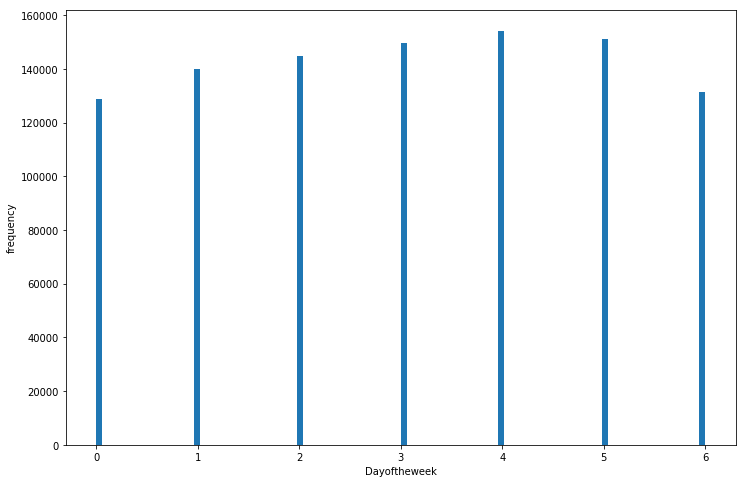

In [50]:
plt.figure(figsize=(12,8))
plt.hist(train['DayOfTheWeek'] ,bins = 100)
plt.xlabel('Dayoftheweek')
plt.ylabel('frequency')

In [0]:
bins_0 = train.loc[(train['distance'] == 0), ['distance']]
bins_1 = train.loc[(train['distance'] > 0) & (train['distance'] <= 10),['distance']]
bins_2 = train.loc[(train['distance'] > 10) & (train['distance'] <= 50),['distance']]
bins_3 = train.loc[(train['distance'] > 50) & (train['distance'] <= 100),['distance']]
bins_4 = train.loc[(train['distance'] > 100) & (train['distance'] <= 200),['distance']]
bins_5 = train.loc[(train['distance'] > 200) & (train['distance'] <= 300),['distance']]
bins_6 = train.loc[(train['distance'] > 300),['distance']]

In [0]:
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'

In [53]:
dist_bins = pd.concat([bins_0 , bins_1 ,bins_2 ,bins_3 , bins_4 ,bins_5,bins_6])
dist_bins.columns

Index(['distance', 'bins'], dtype='object')

In [54]:
Counter(dist_bins['bins'])

Counter({'0': 28481,
         '0-10': 920071,
         '100-200': 206,
         '11-50': 49073,
         '201-300': 5,
         '51-100': 147,
         '>300': 1928})

In [55]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30+00:00,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0


In [0]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [58]:
  test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour


In [59]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11


In [0]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [61]:
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour


In [0]:
high  = train.loc[(train['distance']>200)&(train['fare_amount']!=0)]

In [63]:
high

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00+00:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00+00:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00+00:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58+00:00,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00+00:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


In [64]:
high['distance'] = high.apply(lambda row:(row['fare_amount']-2.50)/1.56 , axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
high

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00+00:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00+00:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00+00:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58+00:00,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00+00:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [0]:
train.update(high)

In [67]:
train[train['distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


In [68]:
train[(train['fare_amount']==0) &( train['distance'] ==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0


In [0]:
train = train.drop(train[(train['fare_amount']==0)&(train['distance']==0)].index ,axis = 0)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999903 entries, 0 to 999999
Data columns (total 14 columns):
key                  999903 non-null datetime64[ns]
fare_amount          999903 non-null float64
pickup_datetime      999903 non-null datetime64[ns]
pickup_longitude     999903 non-null float64
pickup_latitude      999903 non-null float64
dropoff_longitude    999903 non-null float64
dropoff_latitude     999903 non-null float64
passenger_count      999903 non-null float64
distance             999903 non-null float64
Year                 999903 non-null float64
Month                999903 non-null float64
Date                 999903 non-null float64
DayOfTheWeek         999903 non-null float64
Hour                 999903 non-null float64
dtypes: datetime64[ns](2), float64(12)
memory usage: 114.4 MB


In [71]:
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['DayOfTheWeek']>=1) & (train['DayOfTheWeek']<=5)) & (train['distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,14.0


In [0]:
train = train.drop(rush_hour.index , axis=0)

In [0]:
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['DayOfTheWeek']>=1)&(train['DayOfTheWeek']<=5)) & (train['distance']==0) & (train['fare_amount'] < 3.0))]

In [74]:
non_rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,2013.0,5.0,30.0,3.0,0.0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,8.0,21.0,3.0,23.0
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,0.0,2009.0,1.0,7.0,2.0,22.0
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,0.0,2015.0,2.0,27.0,4.0,2.0
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,0.0,2009.0,6.0,17.0,2.0,3.0


In [75]:
weekends = train.loc[((train['DayOfTheWeek']==0) | (train['DayOfTheWeek']==6)) & (train['distance']==0) & (train['fare_amount'] < 3.0)]
weekends

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0
6297,2010-11-15 09:29:00.000000191,2.5,2010-11-15 09:29:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,11.0,15.0,0.0,9.0
9177,2010-12-06 11:48:34.000000500,2.5,2010-12-06 11:48:34,-73.946993,40.744583,-73.946993,40.744583,3.0,0.0,2010.0,12.0,6.0,0.0,11.0
9621,2015-03-01 22:39:54.000000100,2.5,2015-03-01 22:39:54,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,1.0,6.0,22.0
11593,2010-10-17 04:28:00.000000150,2.9,2010-10-17 04:28:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,2010.0,10.0,17.0,6.0,4.0
13571,2009-03-09 12:26:25.000000100,2.5,2009-03-09 12:26:25,-73.416169,40.784140,-73.416169,40.784140,1.0,0.0,2009.0,3.0,9.0,0.0,12.0


In [76]:
train.loc[(train['distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,2015.0,5.0,15.0,4.0,21.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,0.009244,2014.0,6.0,29.0,6.0,16.0
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,0.005783,2015.0,4.0,15.0,2.0,14.0
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,3.0,8.0,0.0,18.0
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,0.003506,2010.0,2.0,20.0,5.0,9.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
489767,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,0.000770,2015.0,2.0,14.0,5.0,21.0


In [0]:
scenario_3 = train.loc[(train['distance']!=0) & (train['fare_amount']==0)]

In [79]:
len(scenario_3)

21

In [78]:
scenario_3.sort_values('distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,DayOfTheWeek,Hour
788466,2010-02-26 22:10:53.000000200,0.0,2010-02-26 22:10:53,-73.812794,40.695922,-73.993577,40.749743,1.0,16.368200,2010.0,2.0,26.0,4.0,22.0
762802,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28,-73.864532,40.770012,-74.030937,40.727139,1.0,14.806275,2015.0,2.0,4.0,2.0,23.0
561786,2013-08-26 00:22:00.000000580,0.0,2013-08-26 00:22:00,-73.988468,40.722775,-73.923687,40.807775,1.0,10.913162,2013.0,8.0,26.0,0.0,0.0
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
895361,2010-02-08 23:39:17.000000200,0.0,2010-02-08 23:39:17,-73.880422,40.741431,-73.873903,40.742301,1.0,0.557666,2010.0,2.0,8.0,0.0,23.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
520715,2015-03-28 18:14:09.000000110,0.0,2015-03-28 18:14:09,-73.987694,40.764881,-73.990150,40.761581,4.0,0.421227,2015.0,3.0,28.0,5.0,18.0
760662,2015-05-24 03:16:52.000000200,0.0,2015-05-24 03:16:52,-74.001633,40.730762,-73.999748,40.733494,1.0,0.342713,2015.0,5.0,24.0,6.0,3.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999901 entries, 0 to 999999
Data columns (total 14 columns):
key                  999901 non-null datetime64[ns]
fare_amount          999901 non-null float64
pickup_datetime      999901 non-null datetime64[ns]
pickup_longitude     999901 non-null float64
pickup_latitude      999901 non-null float64
dropoff_longitude    999901 non-null float64
dropoff_latitude     999901 non-null float64
passenger_count      999901 non-null float64
distance             999901 non-null float64
Year                 999901 non-null float64
Month                999901 non-null float64
Date                 999901 non-null float64
DayOfTheWeek         999901 non-null float64
Hour                 999901 non-null float64
dtypes: datetime64[ns](2), float64(12)
memory usage: 114.4 MB
